In [72]:
import os
from collections import defaultdict


import numpy as np
import scipy as sp
from scipy import misc, stats, linalg
import pandas as pd
from PIL import Image, ImageColor
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from pandas import DataFrame, Series


%matplotlib inline

In [73]:
DIRNAME_IMAGES = '../data/images'

COLOR = {'red': 0,
         'green': 1,
         'blue': 2}

In [74]:
with open('../data/Dataset_test_sasha.txt') as f:
    image_names = [int(name) for name in f.readlines()]

In [75]:
len(image_names)

1001

In [76]:
data_static = DataFrame()
num = 0
d = []
for image_name in image_names[:100]:
    image = np.array(Image.open(os.path.join(DIRNAME_IMAGES, 'im%d.jpg' % (image_name))))
    data = []
    for func in (np.mean, np.var, sp.stats.skew, sp.stats.kurtosis):
        for name, num in COLOR.items():
            a = image[:, :, num].ravel()
            data.append(func(a))
    d.append([image_name, *data])

data_static = pd.DataFrame.from_records(d)
data_static = data_static.rename(columns={0: 'name'}).set_index('name')

In [77]:
# normalize
for column in range(7, 13):
    data_static[column]=(data_static[column]-data_static[column].min()) / (data_static[column].max()-data_static[column].min())

In [78]:
data_static.head()

,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,
16018,45.580790,41.468431,40.377216,1024.438924,897.363995,883.291025,0.356244,0.381006,0.568316,0.127507,0.053785,0.174421
2832,154.111294,153.781394,150.513370,6726.445485,6214.021990,6697.562253,0.165738,0.246919,0.394838,0.025894,0.012693,0.042581
10328,106.175979,121.656235,126.393717,7265.348274,4209.820332,2457.869925,0.349156,0.152334,0.270010,0.016575,0.025060,0.080394
16071,68.568731,155.734336,117.549232,1354.069329,5471.229412,3487.788291,0.129833,0.211591,0.352800,0.033298,0.021358,0.097303
22284,105.647718,132.356751,120.996042,5578.253765,6317.783450,6615.277876,0.225864,0.221709,0.401500,0.016747,0.011711,0.023888


In [79]:
data_static.head()

,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,
16018,45.580790,41.468431,40.377216,1024.438924,897.363995,883.291025,0.356244,0.381006,0.568316,0.127507,0.053785,0.174421
2832,154.111294,153.781394,150.513370,6726.445485,6214.021990,6697.562253,0.165738,0.246919,0.394838,0.025894,0.012693,0.042581
10328,106.175979,121.656235,126.393717,7265.348274,4209.820332,2457.869925,0.349156,0.152334,0.270010,0.016575,0.025060,0.080394
16071,68.568731,155.734336,117.549232,1354.069329,5471.229412,3487.788291,0.129833,0.211591,0.352800,0.033298,0.021358,0.097303
22284,105.647718,132.356751,120.996042,5578.253765,6317.783450,6615.277876,0.225864,0.221709,0.401500,0.016747,0.011711,0.023888


In [80]:
data_static[[1, 2, 3]].cov()

,1,2,3
1,1624.246008,1002.442198,1224.099381
2,1002.442198,1553.973322,1129.369258
3,1224.099381,1129.369258,1260.139549


## Gauss 

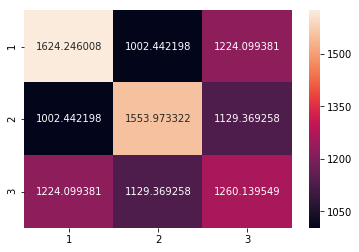

In [81]:
sns.heatmap(data_static[list(range(1, 4))].cov(),  annot=True, fmt='f')

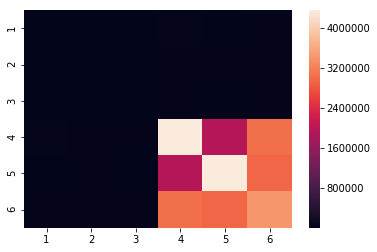

In [82]:
sns.heatmap(data_static[list(range(1, 7))].cov(), fmt='f')

In [83]:
data_static[list(range(1, 7))].cov()

,1,2,3,4,5,6
1,1624.246008,1002.442198,1224.099381,4.670843e+04,8.932977e+03,2.724615e+04
2,1002.442198,1553.973322,1129.369258,2.639189e+04,1.909668e+04,2.377781e+04
3,1224.099381,1129.369258,1260.139549,3.015588e+04,6.747319e+03,2.007824e+04
4,46708.427322,26391.888977,30155.880880,4.336061e+06,1.924834e+06,3.039582e+06
5,8932.976793,19096.680869,6747.318620,1.924834e+06,4.346935e+06,2.948198e+06
6,27246.153044,23777.812705,20078.240453,3.039582e+06,2.948198e+06,3.408306e+06


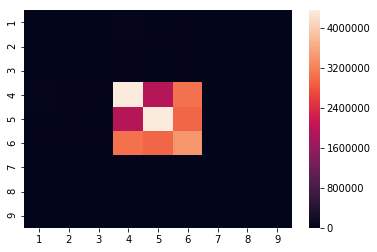

In [84]:
sns.heatmap(data_static[list(range(1, 10))].cov(), fmt='f')

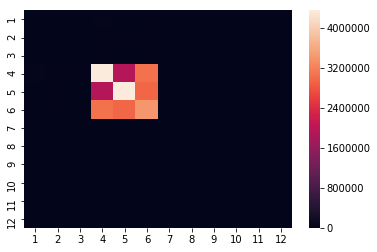

In [85]:
sns.heatmap(data_static[list(range(1, 13))].cov(), fmt='f')

## PCA

In [149]:
for image_name in image_names[13:14]:
    image = np.array(Image.open(os.path.join(DIRNAME_IMAGES, 'im%d.jpg' % (image_names[13]))))
    U, S, Vt = linalg.svd(image[:, :, 0])

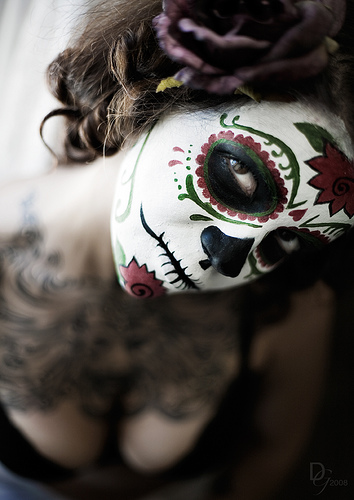

In [150]:
Image.open(os.path.join(DIRNAME_IMAGES, 'im%d.jpg' % (image_names[13])))

In [151]:
image = np.array(Image.open(os.path.join(DIRNAME_IMAGES, 'im%d.jpg' % (image_names[13]))))

In [152]:
image.shape

(500, 354, 3)

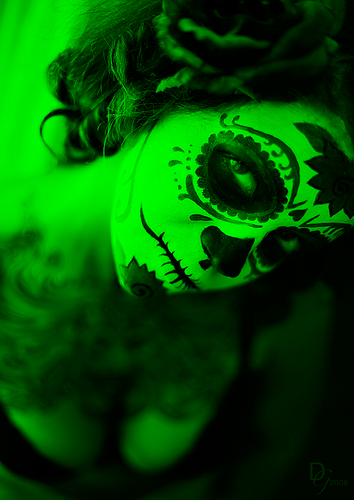

In [153]:
image_green = image.copy()
image_green[:, :, 0] = 0
image_green[:, :, 2] = 0
Image.fromarray(image_green, mode='RGB')

In [154]:
image_green = image[:, :, 1]

In [155]:
U.shape, S.shape, Vt.shape

((500, 500), (354,), (354, 354))

In [156]:
image_green = image[:, :, 1]

In [157]:
image1 = image.copy()
image1[:, :, 0] = 0 
image1[:, :, 2] = 0

In [164]:
def pca(image, components=0):
    '''
    if components == 0 then reconstruction all elements from s
    '''
    image_rec = np.zeros(image.shape, dtype=np.int8)
    for color in range(3):
        U, s, Vt = linalg.svd(image_green[:, :, color], full_matrices=False)
        S = np.zeros((U.shape[1], Vt.shape[0]))
        if 0 < components <= s.shape[0]:
            s_rec = np.append(s[:components], [0]*(s.shape[0] - components))
        else:
            s_rec = s
        S[:min(U.shape[1], Vt.shape[0]), :min(U.shape[1], Vt.shape[0])] = np.diag(s_rec)
        
        image_rec[:, :, color] = U @ S @ Vt
    return image_rec

In [159]:
def pca_color(image, components=0):
    '''
    if components == 0 then reconstruction all elements from s
    '''
    image_rec = np.zeros(image.shape, dtype=np.int8)
    for color in range(3)[:1]:
        U, s, Vt = linalg.svd(image, full_matrices=False)
        S = np.zeros((U.shape[1], Vt.shape[0]))
        if 0 < components <= s.shape[0]:
            s_rec = np.append(s[:components], [0]*(s.shape[0] - components))
        else:
            s_rec = s
        S[:min(U.shape[1], Vt.shape[0]), :min(U.shape[1], Vt.shape[0])] = np.diag(s_rec)
        
        image_rec = U @ S @ Vt
    return image_rec

In [178]:
mse = {}
for i in range(1, min(image.shape[:2])+1):
    image_new = pca_color(image_green, components=i)
    mse[i] = ((image_new - image1[:, :, 1]) ** 2).sum() ** 0.5
    print('%3d : mse: %f' % (i, mse[i]))

  1 : mse: 21196.008383
  2 : mse: 17966.190999
  3 : mse: 14837.783413
  4 : mse: 13420.190689
  5 : mse: 12359.855095
  6 : mse: 11464.934037
  7 : mse: 10930.251286
  8 : mse: 10435.674190
  9 : mse: 9969.131309
 10 : mse: 9502.140372
 11 : mse: 9045.919060
 12 : mse: 8656.101003
 13 : mse: 8353.558616
 14 : mse: 8062.540172
 15 : mse: 7817.461844
 16 : mse: 7585.013572
 17 : mse: 7349.691932
 18 : mse: 7124.332195
 19 : mse: 6900.301620
 20 : mse: 6695.539746
 21 : mse: 6505.488357
 22 : mse: 6327.186297
 23 : mse: 6164.984464
 24 : mse: 6002.994388
 25 : mse: 5847.282169
 26 : mse: 5704.199721
 27 : mse: 5563.182329
 28 : mse: 5434.175620
 29 : mse: 5310.681853
 30 : mse: 5192.024649
 31 : mse: 5085.476759
 32 : mse: 4980.416689
 33 : mse: 4880.788648
 34 : mse: 4785.951276
 35 : mse: 4693.464795
 36 : mse: 4609.252949
 37 : mse: 4529.238987
 38 : mse: 4448.666451
 39 : mse: 4371.708476
 40 : mse: 4294.939280
 41 : mse: 4218.149145
 42 : mse: 4143.071650
 43 : mse: 4069.695883
 44

In [174]:
image_new = pca_color(image_green, components=1000)
print(((image_new - image1[:, :, 1]) ** 2).sum() ** 0.5)

4.68027193216e-10


In [163]:
image_green

array([[155, 157, 157, ...,  10,  11,  11],
       [155, 157, 157, ...,   7,  10,  10],
       [156, 157, 157, ...,   4,   5,   6],
       ..., 
       [ 88,  87,  85, ...,   6,   5,   5],
       [ 87,  86,  84, ...,   6,   5,   5],
       [ 87,  86,  85, ...,   6,   5,   5]], dtype=uint8)

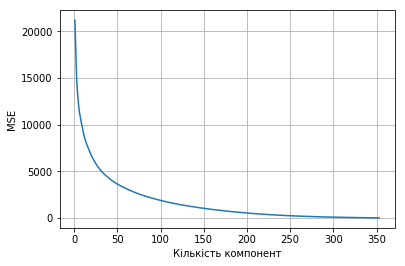

In [115]:
lists = sorted(mse.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel('Кількість компонент')
plt.ylabel('MSE')
plt.grid()

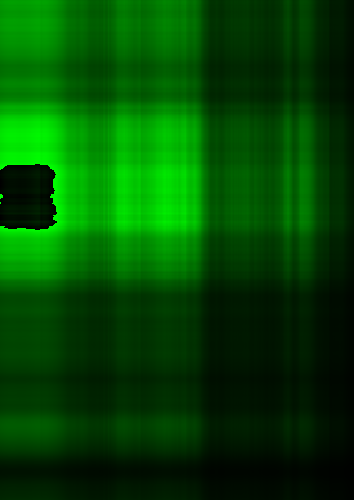

In [123]:
Image.fromarray(pca(image_green, components=1), mode='RGB')

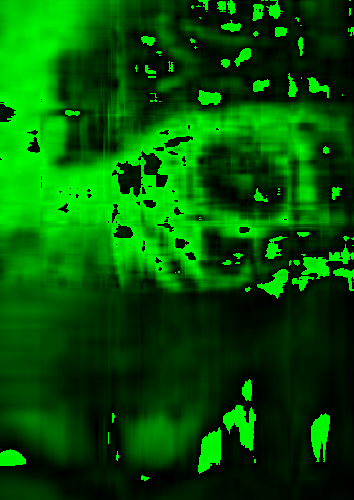

In [124]:
Image.fromarray(pca(image_green, components=10), mode='RGB')

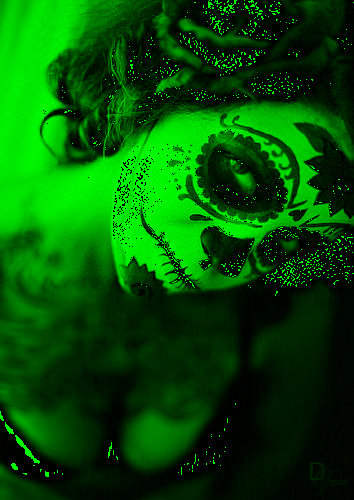

In [125]:
Image.fromarray(pca(image_green, components=100), mode='RGB')

## Markov

In [126]:
#down
color = 0

stochastic_matrix = np.zeros((256, 256))

for i in range(image.shape[0]-1):
    for j in range(image.shape[1]):
        k1, k2 = image[i, j, color], image[i+1, j, color]
        stochastic_matrix[k1, k2] += 1

In [127]:
stochastic_matrix = (stochastic_matrix.T / stochastic_matrix.sum(axis=1)).T # normalize

In [67]:
stochastic_matrix_5 = stochastic_matrix.copy()
for s in range(4):
    stochastic_matrix_5 = stochastic_matrix_5 @ stochastic_matrix

In [68]:
stochastic_matrix_5.all() # регулярная и рекурентная

True

In [69]:
(stochastic_matrix_5 * stochastic_matrix_5.T).all() # irreducible

True

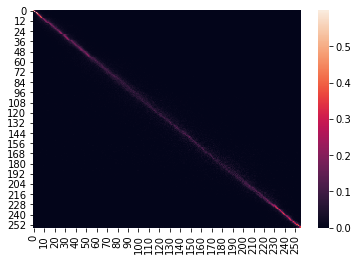

In [128]:
sns.heatmap(stochastic_matrix, fmt='f')

In [135]:
#up
color = 0

stochastic_matrix = np.zeros((256, 256))

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        k1, k2 = image[i, j, color], image[i-1, j, color]
        stochastic_matrix[k1, k2] += 1

In [136]:
stochastic_matrix = (stochastic_matrix.T / stochastic_matrix.sum(axis=1)).T # normalize

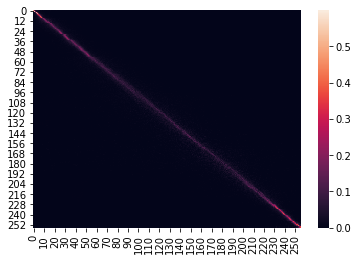

In [137]:
sns.heatmap(stochastic_matrix, fmt='f')

In [ ]:
stochastic_matrix

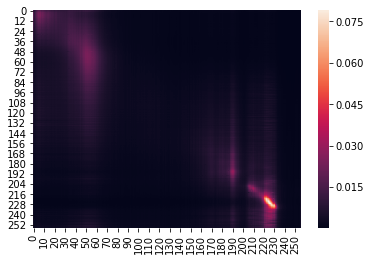

In [71]:
sns.heatmap(stochastic_matrix_5, fmt='f')